<a href="https://colab.research.google.com/github/srinakasam19/CodEvo-Solutions-DS/blob/main/spam_emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...
label     int64
text     object
dtype: object
Unique labels: ['1' '0']
Label Counts:
 label
1    43910
0    39538
Name: count, dtype: int64


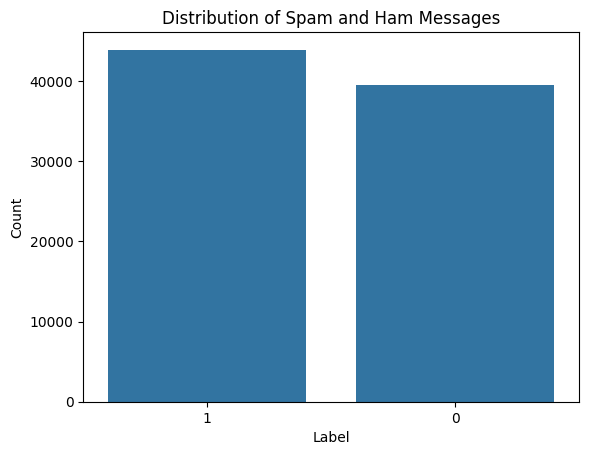

No spam messages found.
No ham messages found.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


53/53 - 100s - 2s/step - accuracy: 0.5222 - loss: 0.6921
Epoch 2/5
53/53 - 142s - 3s/step - accuracy: 0.5237 - loss: 0.6922
Epoch 3/5
53/53 - 140s - 3s/step - accuracy: 0.5252 - loss: 0.6922
Epoch 4/5
53/53 - 141s - 3s/step - accuracy: 0.5252 - loss: 0.6921
Epoch 5/5
53/53 - 143s - 3s/step - accuracy: 0.5252 - loss: 0.6921


53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5206710605152786
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       800
           1       0.52      1.00      0.68       869

    accuracy                           0.52      1669
   macro avg       0.26      0.50      0.34      1669
weighted avg       0.27      0.52      0.36      1669



['tfidf_vectorizer.pkl']

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

# Load the dataset
data = pd.read_csv('/content/combined_data.csv')

# Display the first few rows and data types
print(data.head())
print(data.dtypes)

# Convert the label column to string type if it's not already
data['label'] = data['label'].astype(str).str.strip()

# Check unique values in the label column
print("Unique labels:", data['label'].unique())

# Check the distribution of spam and ham
label_counts = data['label'].value_counts()
print("Label Counts:\n", label_counts)

# EDA: Visualize the distribution of spam and ham messages
sns.countplot(x='label', data=data)
plt.title("Distribution of Spam and Ham Messages")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Generate word cloud for spam messages
if 'spam' in data['label'].values:
    spam_words = ' '.join(data[data['label'] == 'spam']['text'])
    if spam_words:
        wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud_spam, interpolation='bilinear')
        plt.axis('off')
        plt.title("Word Cloud for Spam Messages")
        plt.show()
    else:
        print("No words found in spam messages for the word cloud.")
else:
    print("No spam messages found.")

# Generate word cloud for ham messages
if 'ham' in data['label'].values:
    ham_words = ' '.join(data[data['label'] == 'ham']['text'])
    if ham_words:
        wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud_ham, interpolation='bilinear')
        plt.axis('off')
        plt.title("Word Cloud for Ham Messages")
        plt.show()
    else:
        print("No words found in ham messages for the word cloud.")
else:
    print("No ham messages found.")

# Sample a smaller dataset for quicker testing
data_sample = data.sample(frac=0.1, random_state=42)  # Sample 10% of the data
X = data_sample['text']
y = data_sample['label']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF with reduced features
vectorizer = TfidfVectorizer(max_features=1000)  # Reduce max features
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Build a simplified LSTM model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=64, input_length=X_train_tfidf.shape[1]))  # Reduce embedding size
model.add(SpatialDropout1D(0.2))
model.add(LSTM(50))  # Reduce the number of LSTM units
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with increased batch size
model.fit(X_train_tfidf, y_train, epochs=5, batch_size=128, verbose=2)

# Make predictions
y_pred = model.predict(X_test_tfidf)
y_pred_classes = (y_pred > 0.5).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Optional: Save the model and vectorizer for future use
model.save('spam_detector_model.h5')
import joblib
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


In [ ]:
# Install necessary libraries (if not already installed)
!pip install pandas numpy matplotlib seaborn wordcloud nltk imbalanced-learn tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D

# Load the dataset
data = pd.read_csv('/content/combined_data.csv')

# Display the first few rows and check for null values
print(data.head())
print(data.isnull().sum())

# Clean the labels
data['label'] = data['label'].astype(str).str.strip()

# Remove duplicates
data = data.drop_duplicates()

# Check class distribution
print(data['label'].value_counts())

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    # Remove punctuation and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Tokenize and remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Preprocess the text data
data['text'] = data['text'].apply(preprocess_text)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X = vectorizer.fit_transform(data['text']).toarray()
y = data['label'].values

# Encode labels (spam=1, ham=0)
y_encoded = np.where(y == 'spam', 1, 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Use SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print new class distribution to verify
print("Resampled class distribution:", Counter(y_resampled))

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=X_resampled.shape[1]))  # Use X_resampled
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, return_sequences=True))  # Add another LSTM layer
model.add(LSTM(32))  # Final LSTM layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the resampled data
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.fit(X_resampled, y_resampled, epochs=5, batch_size=128, validation_split=0.1, callbacks=[early_stopping], verbose=2)

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))

# Visualize the spam words using WordCloud
spam_words = ' '.join(data[data['label'] == 'spam']['text'])  # Using 'text' for spam messages
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Spam Messages')
plt.show()


   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...
label    0
text     0
dtype: int64
label
1    43910
0    39538
Name: count, dtype: int64
